In [ ]:
import pandas as pd
import nltk
import ast
nltk.download('stopwords') 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from pyLDAvis import sklearn as sklearn_lda
import re
import os
import numpy as np
from gensim import models, corpora
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from nltk import tokenize
import pyLDAvis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('Juarez_words_full.csv')
df_words = df[['Palavras']]
df_words['Palavras'] = df_words['Palavras'].apply(ast.literal_eval)

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
stop_words = stopwords.words('portuguese')
stop_words_manual = ['to','pt','sobre','ca','si','al','ra','ainda','ai','so','ta','ae','fl','in','oa','fi','at','co','li','ti','qualquer','ha','dr','sa','ter','be','tal','ar','sob','onde','es','ma','of','ri','re','ir','assim','la','sempre','desde','cl','jl','is','mo','am','ac','it','oe','an','st','ro','or','en','vez','on','pa','io','dc','lo','deste','alguns','fa','pe','mi','lu','mm','va','pis','ua','af','agora','ce','le','il','he','vossa','via','pi','ne','des','ali','pr','om','quais','nesse','alguma','el','cr','az','aj','aue','ei','au','demais','nessa','av','qua','ul','ho','et','po','vo','perante','ve','pu','di','ap','tr','ie','su','ui','un','ad','per','nt','logo','go','ji','du','bo','fo','er','jo','mu']

stop_words = set(stop_words + stop_words_manual)

In [ ]:
def retirar_stop_words(x):
    words = [i for i in x if i not in stop_words]
    return words

In [ ]:
df_words['Palavras'] = df_words['Palavras'].apply(retirar_stop_words) 

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_words['Palavras'] = df_words['Palavras'].apply(lambda x: ' '.join(word for word in x))

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


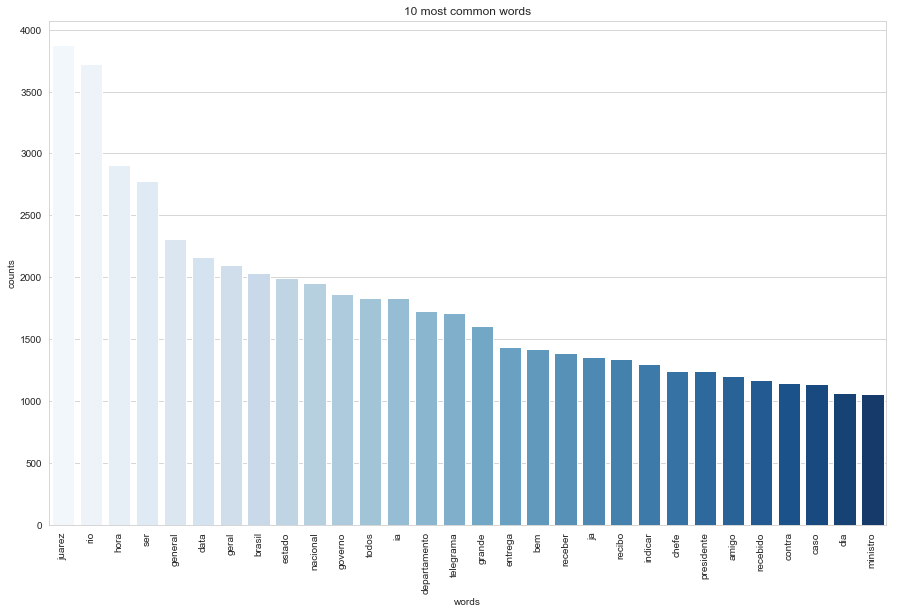

In [ ]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    #sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='Blues')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer()
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_words['Palavras'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
#Quantidade de tópicos: 20, 30, 50
#Quantidade de palavras: 15, 30, 50

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    f = open(f"LDA_{number_topics}_topics_{number_words}_words.txt", "w")
    f.write(f"Topics found via LDA: {number_topics}_topics_{number_words}_words")
    
    for topic_idx, topic in enumerate(model.components_):
        f.write("\nTopic #%d:" % topic_idx)
        f.write(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) 
    f.close()
    
    
for qtd_topicos in [20, 30, 50]:
    for qtd_palavras in [15, 30, 50]:
        
        # Tweak the two parameters below
        number_topics = qtd_topicos
        number_words = qtd_palavras
        # Create and fit the LDA model
        lda = LDA(n_components=number_topics, n_jobs=-1, max_iter = 600)
        lda.fit(count_data)
        # Print the topics found by the LDA model

        print_topics(lda, count_vectorizer, number_words)
        
        
        LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
        pyLDAvis.save_html(LDAvis_prepared, f'ldavis_topics_{number_topics}_words_{number_words}'+'.html')

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. 

In [ ]:
'''from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 20
number_words = 15
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)'''

Topics found via LDA:

Topic #0:
gabinete estado ae vi agricultura ministro oa ta mm secretario cr secretaria qua ax ia

Topic #1:
ser nacional brasil governo ainda sobre problema deve todos pode outro bem cada estados tal

Topic #2:
pt juarez rio procedente geral interventor re data hora be major co general ra ca

Topic #3:
caso bem ser amigo eminente sempre todos juarez sobre estado qualquer carta militar todas chefia

Topic #4:
of to in it an on at is be he or az au general ali

Topic #5:
hora telegrama departamento entrega recibo indicar receber data contem recebido carimbo juarez seguintes rio lu

Topic #6:
todos ainda ser governo qualquer si ter contra tal ha pois porque assim ae grande

Topic #7:
rio grande ser estado ainda obras sul porto dia onde sob sobre outros parte bem

Topic #8:
silva francisco dr carlos manoel luiz paulo lima costa pedro pereira souza oliveira santos rio

Topic #9:
al ca fi ai jl cl fa geral ja fl ar at af ia ac

Topic #10:
sobre ser departamento naciona

In [ ]:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_topics_20_words_15'+'.html')

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [ ]:
lista = 'to pt sobre ca si al ra ainda ai so ta ae fl in oa fi at co li ti qualquer ha dr sa ter be tal ar sob onde es ma of ri re ir assim la sempre desde cl jl is mo am ac it oe an st ro or en vez on pa io dc lo deste alguns fa pe mi lu mm va pis ua af agora ce le il he vossa via pi ne des ali pr om quais nesse alguma el cr az aj aue ei au demais nessa av qua ul ho et po vo perante ve pu di ap tr ie su ui un ad per nt logo go ji du bo fo er jo mu' 

In [ ]:
lista.split()

['to',
 'pt',
 'sobre',
 'ca',
 'si',
 'al',
 'ra',
 'ainda',
 'ai',
 'so',
 'ta',
 'ae',
 'fl',
 'in',
 'oa',
 'fi',
 'at',
 'co',
 'li',
 'ti',
 'qualquer',
 'ha',
 'dr',
 'sa',
 'ter',
 'be',
 'tal',
 'ar',
 'sob',
 'onde',
 'es',
 'ma',
 'of',
 'ri',
 're',
 'ir',
 'assim',
 'la',
 'sempre',
 'desde',
 'cl',
 'jl',
 'is',
 'mo',
 'am',
 'ac',
 'it',
 'oe',
 'an',
 'st',
 'ro',
 'or',
 'en',
 'vez',
 'on',
 'pa',
 'io',
 'dc',
 'lo',
 'deste',
 'alguns',
 'fa',
 'pe',
 'mi',
 'lu',
 'mm',
 'va',
 'pis',
 'ua',
 'af',
 'agora',
 'ce',
 'le',
 'il',
 'he',
 'vossa',
 'via',
 'pi',
 'ne',
 'des',
 'ali',
 'pr',
 'om',
 'quais',
 'nesse',
 'alguma',
 'el',
 'cr',
 'az',
 'aj',
 'aue',
 'ei',
 'au',
 'demais',
 'nessa',
 'av',
 'qua',
 'ul',
 'ho',
 'et',
 'po',
 'vo',
 'perante',
 've',
 'pu',
 'di',
 'ap',
 'tr',
 'ie',
 'su',
 'ui',
 'un',
 'ad',
 'per',
 'nt',
 'logo',
 'go',
 'ji',
 'du',
 'bo',
 'fo',
 'er',
 'jo',
 'mu']

In [ ]:
f = open("demofile3.txt", "w")
f.write(print("Woops! I have deleted the content!"))
f.close()

Woops! I have deleted the content!


TypeError: write() argument must be str, not None

In [ ]:
a = print('te')

te


In [ ]:
print(a)

None


In [ ]:
LDA(,